# Day5 データの可視化 - Matplotlib

In [1]:
#ライブラリのインポート
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# Matplotlibの基本事項
- まずは、Matplotlibの可視化を体験

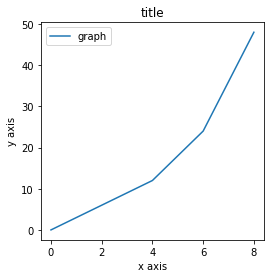

In [3]:
# グラフのサイズの指定
plt.figure(figsize=(4,4))
# 引数に指定された値のプロット。引数として、描画する点のx座標, y座標の設定、凡例に表示する文字列の設定
plt.plot([0,2,4,6,8], [0,6,12,24,48],  label="graph")
# x, y軸のラベルの設定
plt.xlabel("x axis")
plt.ylabel("y axis")
# タイトルの設定
plt.title("title")
#　凡例の表示
plt.legend()
# グラフの出力
plt.show()

- 次の三つの曲線をプロット

$$
y = x^2 \\
z = (x - 1)^2 \\
w = {(x - 2)(x - 4)}^2 \\
$$

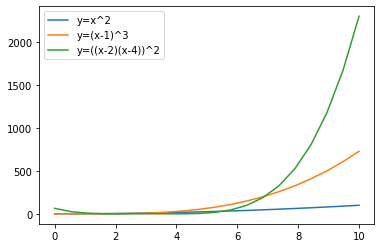

In [4]:
# 0から10まで、20個の等差数列を生成
x=np.linspace(0,10,20)
y=x**2
z=(x-1)**3
w=((x-2)*(x-4))**2
# 横軸にx, 縦軸にそれぞれy, z, wを指定し、それぞれを判別できるラベルを凡例とする
plt.plot(x,y,label="y=x^2")
plt.plot(x,z,label="y=(x-1)^3")
plt.plot(x,w,label="y=((x-2)(x-4))^2")
# 凡例の表示
plt.legend()

# 複数のグラフを別々に描く

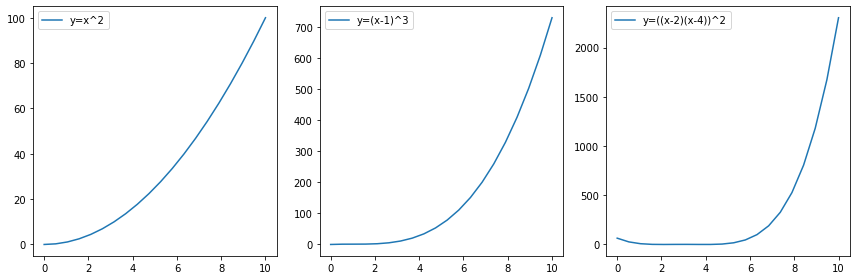

In [5]:
plt.figure(figsize = (12,4))

# plt.subplotを用いて 行x列数分だけグラフを分割して表示
# subplot(行, 列, 表示する位置)と引数を与える

# 1列目に表示
plt.subplot(1,3,1)
plt.plot(x,y,label="y=x^2")
plt.legend()

# 2列目に表示
plt.subplot(1,3,2)
plt.plot(x,z,label="y=(x-1)^3")
plt.legend()

# 3列目に表示
plt.subplot(1,3,3)
plt.plot(x,w,label="y=((x-2)(x-4))^2")
plt.legend()

#グラフ同士の重なりを防ぐ
plt.tight_layout()

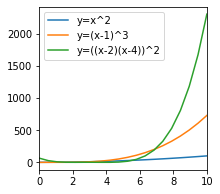

In [6]:
# 3x3でサイズ指定された空のfigureを作成
fig=plt.figure(figsize=(3,3))

# figの中に、1行1列のaxesをfigの中に作成
ax=fig.add_subplot(1,1,1)

# axの中に実際にグラフを描画
ax.plot(x,y,label="y=x^2")
ax.plot(x,z,label="y=(x-1)^3")
ax.plot(x,w,label="y=((x-2)(x-4))^2")

# xの描画範囲を0, 10に設定
# axesに対して設定する場合はset_が先頭につくことに注意
ax.set_xlim(0,10)
ax.legend()

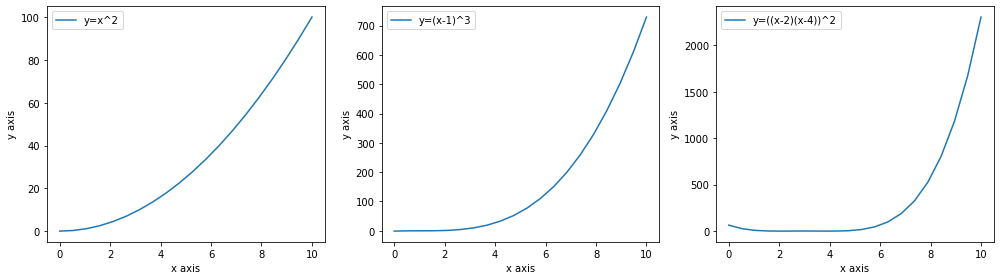

In [7]:
# 1行3列のaxesを生成
fig,ax=plt.subplots(1,3,figsize=(14,4))
print(ax)#axはarray形式であることを確認
ax[0].plot(x,y,label="y=x^2")
ax[1].plot(x,z,label="y=(x-1)^3")
ax[2].plot(x,w,label="y=((x-2)(x-4))^2")
# for分で三つのグラフを順番に描画
for i in range(3):
    ax[i].legend()
    ax[i].set_xlabel("x axis")
    ax[i].set_ylabel("y axis")
plt.tight_layout()

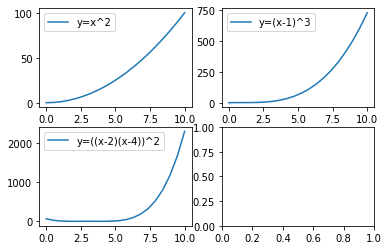

In [8]:
# 2行2列のaxesを生成
fig,ax=plt.subplots(2,2)

# np.array形式であることを利用して描画
ax[0,0].plot(x,y,label="y=x^2")
ax[0,0].legend()
ax[0,1].plot(x,z,label="y=(x-1)^3")
ax[0,1].legend()
ax[1,0].plot(x,w,label="y=((x-2)(x-4))^2")
ax[1,0].legend()

# Matplotlibの基本事項 演習

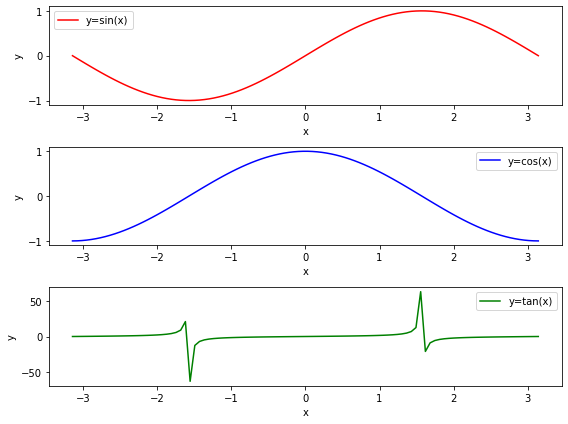

In [9]:
# 3行1列のaxesを生成
fig,ax=plt.subplots(3,1,figsize = (8,6))

x = np.linspace(-1*np.pi, np.pi,100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)
ax[0].plot(x,y1,label="y=sin(x)", color = "red")
ax[1].plot(x,y2,label="y=cos(x)", color = "blue")
ax[2].plot(x,y3,label="y=tan(x)", color  = "green")

# グラフ共通の装飾
for i in range(3):
    ax[i].set_xlabel("x")
    ax[i].set_ylabel("y")
    ax[i].legend()

plt.tight_layout()

# Matplotlibによる可視化

In [10]:
#データのインポート
tips=pd.read_csv("./tips/tips.csv")

In [11]:
tips.head()#先頭の5行を表示
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [12]:
tips.isnull().sum()#欠損値を数える

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

<BarContainer object of 4 artists>

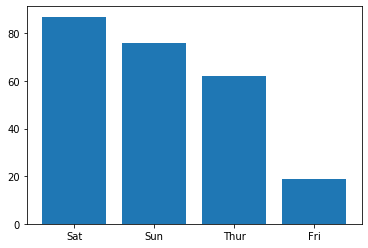

In [13]:
# 各棒のxの値
left=range(4)
# 曜日を取得
day=tips.day.value_counts().keys()
# 棒の高さ
height=tips.day.value_counts().values
# 棒グラフの表示
# leftで与えられたxの値を、tick_labelに代入されたdayの文字列で置き換えている
plt.bar(left,height,tick_label=day)

In [14]:
# 
# day=tips.day.value_counts()
day=tips["day"].value_counts()
day_key=tips["day"].value_counts().keys()
day_v=tips["day"].value_counts().values
print(day)
print(day_key)
print(day_v)

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64
Index(['Sat', 'Sun', 'Thur', 'Fri'], dtype='object')
[87 76 62 19]


In [15]:
# 円グラフの表示
# autopctはフォーマット指定子、%.3f%%とすれば、小数第３位まで表示できる

([<matplotlib.patches.Wedge at 0x124845d10>,
 [Text(0.47909423581850485, 0.990186201280084, 'Sat'),
  Text(-1.0967192869113325, -0.08489290734035711, 'Sun'),
  Text(0.3074340394718735, -1.0561649072820052, 'Thur'),
  Text(1.06724906774893, -0.2664196452760947, 'Fri')],
 [Text(0.26132412862827537, 0.5401015643345912, '35.7%'),
  Text(-0.598210520133454, -0.04630522218564932, '31.1%'),
  Text(0.16769129425738552, -0.5760899494265482, '25.4%'),
  Text(0.5821358551357799, -0.14531980651423346, '7.8%')])

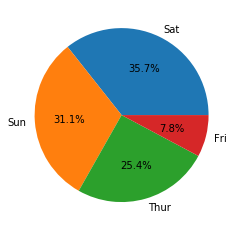

In [16]:
plt.pie(tips.day.value_counts(),autopct="%.1f%%",labels=tips.day.value_counts().keys())

Text(0.5, 1.0, 'histgram of total_bill')

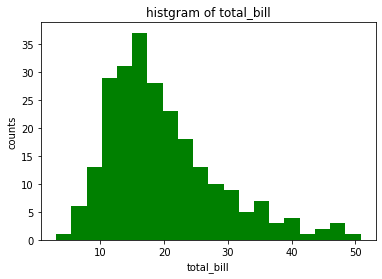

In [17]:
# ヒストグラムの表示
# bins: 縦棒の数 color: 色の指定
plt.hist(tips.total_bill,bins=20,color="green")
plt.xlabel("total_bill")
plt.ylabel("counts")
plt.title("histgram of total_bill")

Text(0, 0.5, 'tip')

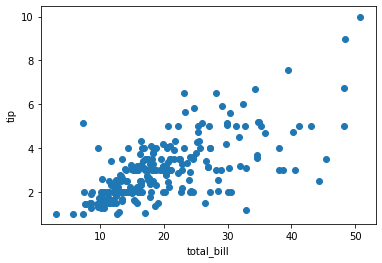

In [18]:
# 散布図の表示
# 引数: (x座標, y座標) = (tips["total_bill"], tips["tip"])
plt.scatter(x=tips["total_bill"],y=tips["tip"])
plt.xlabel("total_bill")
plt.ylabel("tip")

# Matplotlibによる可視化 演習

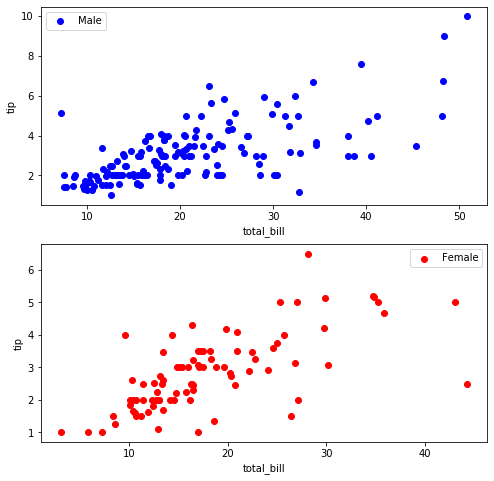

In [19]:
# 2行1列のaxesを生成
fig,ax=plt.subplots(2,1,figsize = (8,8))

tips_male = tips[tips["sex"] == "Male"][["total_bill","tip"]]
tips_female = tips[tips["sex"] == "Female"][["total_bill","tip"]]

ax[0].scatter(x=tips_male["total_bill"],y=tips_male["tip"], label = "Male", color = "blue")
ax[1].scatter(x=tips_female["total_bill"],y=tips_female["tip"],label = "Female",color = "red")

for i in range(2):
    ax[i].set_xlabel("total_bill")
    ax[i].set_ylabel("tip")
    ax[i].legend()